# IMPORTING ALL NECESSARY LIBRARIES AND FUNCTIONS

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPool2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import model_from_json
from keras import backend as K
from google.colab import files
from glob import glob
import random
import matplotlib.gridspec as gridspec
import seaborn as sns
import zlib
import itertools
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.models import Model
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

from keras import optimizers
from google.colab import files

# CHECKING IF THE GPU IS WORKING 

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# IMPORTING THE DATASET FROM GOOGLE DRIVE 

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

train_path='/content/drive/MyDrive/train_dataset'
test_path='/content/drive/MyDrive/test_dataset'

train_datagen=ImageDataGenerator(rescale=1./255,shear_range=.2, zoom_range=.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')
testing_set=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Found 4596 images belonging to 2 classes.
Found 2159 images belonging to 2 classes.


# ResNet-50 MODEL
### MAKING, COMPILATION, STRUCTURE, FITTING, PROGRESS VISUALIZATION AND HEATMAP

94781440/94765736 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


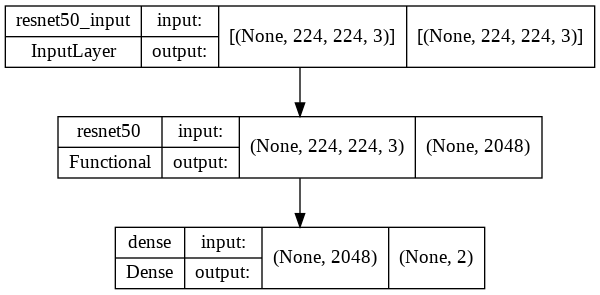

In [5]:
from tensorflow.keras.applications import ResNet50

model4=Sequential()

# adding the pre trained ResNet 50 model
model4.add(ResNet50(include_top=False,weights='imagenet',pooling='max',input_shape=(224,224,3)))

# adding the output layer
model4.add(Dense(2,activation='softmax'))

# compilig the model
model4.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.SGD(lr=.01),metrics=['accuracy'])

# printing the blueprint of the model
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [7]:
# fitting the alexnet model
r4=model4.fit_generator(training_set,validation_data=testing_set,epochs=20,steps_per_epoch=(len(training_set)),validation_steps=(len(testing_set)))

# keys present in the history
print(r4.history.keys())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
144/144 [==============================] - 1148s 8s/step - loss: 3.3457 - accuracy: 0.6471 - val_loss: 0.7125 - val_accuracy: 0.2668
Epoch 2/20
144/144 [==============================] - 193s 1s/step - loss: 0.8694 - accuracy: 0.7291 - val_loss: 1.0199 - val_accuracy: 0.2668
Epoch 3/20
144/144 [==============================] - 185s 1s/step - loss: 0.4263 - accuracy: 0.8427 - val_loss: 1.1776 - val_accuracy: 0.2668
Epoch 4/20
144/144 [==============================] - 180s 1s/step - loss: 0.3386 - accuracy: 0.8799 - val_loss: 1.4943 - val_accuracy: 0.2668
Epoch 5/20
144/144 [==============================] - 185s 1s/step - loss: 0.2600 - accuracy: 0.9019 - val_loss: 2.1196 - val_accuracy: 0.2668
Epoch 6/20
144/144 [==============================] - 184s 1s/step - loss: 0.1962 - accuracy: 0.9249 - val_loss: 2.6811 - val_accuracy: 0.2668
Epoch 7/20
144/144 [==============================] - 184s 1s/step - loss: 0.1695 - accuracy: 0.9395 - val_loss: 0.9504 - val_accuracy: 0.489

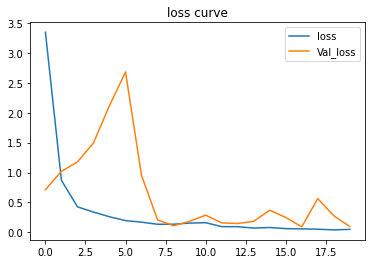

Text(0.5, 1.0, 'Accuracy Evolution')

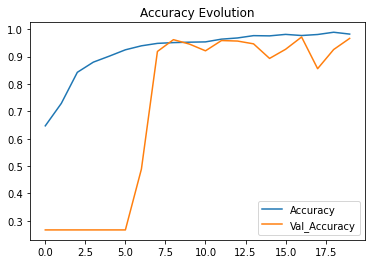

In [8]:
import matplotlib.pyplot as plt

plt.plot(r4.history['loss'],label='loss')
plt.plot(r4.history['val_loss'],label='Val_loss')
plt.title('loss curve')
plt.legend()
plt.show()

plt.plot(r4.history['accuracy'], label='Accuracy')
plt.plot(r4.history['val_accuracy'], label='Val_Accuracy')
plt.title('accuracy curve')
plt.legend()
plt.title('Accuracy Evolution')

In [9]:
evaluation=model4.evaluate(testing_set)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation=model4.evaluate(training_set)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

68/68 [==============================] - 55s 807ms/step - loss: 0.0962 - accuracy: 0.9667
Test Accuracy: 96.67%
144/144 [==============================] - 119s 824ms/step - loss: 0.0485 - accuracy: 0.9813
Train Accuracy: 98.13%
